# 1a

In [143]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy
from cvxpy import *
% matplotlib inline

[[2.41124895 0.51571951]
 [2.199911   0.19827759]
 [3.22753921 1.0844333 ]
 [3.91401875 1.57530454]
 [2.91126225 1.2148961 ]
 [2.58565024 0.78072786]
 [3.36722074 1.18669864]
 [3.0628398  0.96846525]
 [2.55299009 0.54569499]
 [3.10282533 1.23065302]
 [2.44374369 0.72533183]
 [3.14713231 0.98589015]
 [2.92640297 1.10420234]
 [2.87167883 0.61408067]
 [2.68826988 1.02488078]
 [2.63591448 0.84203009]
 [2.47445207 0.62805196]
 [3.05770665 1.06687568]
 [3.15215717 1.37344756]
 [3.19652427 0.91754881]
 [3.65359309 1.58441416]
 [2.19385608 0.52687248]
 [2.84645518 0.94887297]
 [3.19526667 1.07173749]
 [2.96914979 1.37165135]
 [2.8142704  0.59277442]
 [2.79341398 0.7130148 ]
 [2.54667716 0.68124182]
 [2.92834486 0.6291025 ]
 [3.16230843 1.18127479]
 [2.62500659 0.84808409]
 [3.64774329 1.64647777]
 [2.64690243 0.95192354]
 [2.88588527 0.86377177]
 [3.27306999 0.98771157]
 [3.21203962 1.30142265]
 [2.89071513 0.64870819]
 [3.47574714 1.27576825]
 [2.61781168 0.66099899]
 [3.46050601 1.25628454]


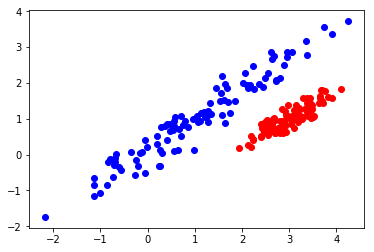

In [144]:
# Define the two sets 
d = 2   # Dimension of problem. We'll leave at 2 for now.
m = 100 # Number of points in each class
n = 100  

x_center = [1,1]  # E.g. [1,1]
y_center = [3,1]  # E.g. [2,2]

# Set a seed which will generate feasibly separable sets
#  Note: these may only be separable with the default tutorial settings
np.random.seed(8)  

# Define random orientations for the two clusters
orientation_x = np.random.rand(2,2)
orientation_y = np.random.rand(2,2)
#print(orientation_x.shape)

# Generate unit-normal elements, but clip outliers.
rx = np.clip(np.random.randn(m,d),-2,2)
#print(rx.shape)
ry = np.clip(np.random.randn(n,d),-2,2)
#print(ry.shape)
x = x_center + np.dot(rx,orientation_x)
#print(x.shape)
y = y_center + np.dot(ry,orientation_y)
print(y)
#print(y[:,1])

# Check out our clusters!
plt.scatter(x[:,0],x[:,1],color='blue')
plt.scatter(y[:,0],y[:,1],color='red')

In [145]:
## Define a helper function for plotting the results, the decision plane, and the supporting planes

def plotClusters(x,y,a,b,t):
    # Takes in a set of datapoints x and y for two clusters,
    #  the hyperplane separating them in the form a'x -b = 0,
    #  and a slab half-width t
    print(type(x[:,0]), y[:,0])
    d1_min = np.min([x[:,0],y[:,0]])
    print(d1_min)
    d1_max = np.max([x[:,0],y[:,0]])
    #print(d1_max)
    # Line form: (-a[0] * x - b ) / a[1]
    d2_atD1min = (-a[0]*d1_min + b ) / a[1]
    #print(d2_atD1min)
    d2_atD1max = (-a[0]*d1_max + b ) / a[1]
    #print(d2_atD1max)
    
    sup_up_atD1min = (-a[0]*d1_min + b + t ) / a[1]
    sup_up_atD1max = (-a[0]*d1_max + b + t ) / a[1]
    sup_dn_atD1min = (-a[0]*d1_min + b - t ) / a[1]
    sup_dn_atD1max = (-a[0]*d1_max + b - t ) / a[1]

    # Plot the clusters!
    plt.scatter(x[:,0],x[:,1],color='blue')
    plt.scatter(y[:,0],y[:,1],color='red')
    plt.plot([d1_min,d1_max],[d2_atD1min,d2_atD1max],color='black')
    plt.plot([d1_min,d1_max],[sup_up_atD1min,sup_up_atD1max],'--',color='gray')
    plt.plot([d1_min,d1_max],[sup_dn_atD1min,sup_dn_atD1max],'--',color='gray')
    plt.ylim([np.floor(np.min([x[:,1],y[:,1]])),np.ceil(np.max([x[:,1],y[:,1]]))])

1.0 + -var22567[0] <= var22565 * [0.99153027 0.12463006] + -var22566
Problem Status: optimal
<class 'numpy.ndarray'> 100
<class 'numpy.ndarray'> [2.41124895 2.199911   3.22753921 3.91401875 2.91126225 2.58565024
 3.36722074 3.0628398  2.55299009 3.10282533 2.44374369 3.14713231
 2.92640297 2.87167883 2.68826988 2.63591448 2.47445207 3.05770665
 3.15215717 3.19652427 3.65359309 2.19385608 2.84645518 3.19526667
 2.96914979 2.8142704  2.79341398 2.54667716 2.92834486 3.16230843
 2.62500659 3.64774329 2.64690243 2.88588527 3.27306999 3.21203962
 2.89071513 3.47574714 2.61781168 3.46050601 2.54256952 3.10567613
 2.39562972 3.33158017 3.74778519 2.96594328 3.28702382 2.83939992
 2.76472387 3.72600068 2.23934622 2.49749372 2.79981607 2.52583037
 2.53279064 3.45138279 3.38955331 3.2281326  3.43341127 2.42602035
 3.19012262 3.49565469 3.13999932 3.29917837 3.20652719 2.22547333
 2.88560691 2.90510914 3.52869668 2.70856134 3.38812417 2.54799208
 3.81338287 3.43714961 3.68574263 2.40123088 2.9116

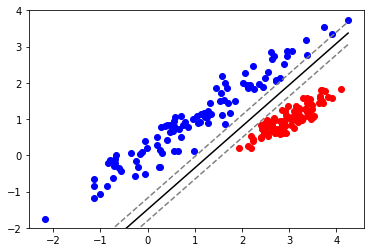

In [146]:
## OPTIMIZATION- in CvxPy!

a = Variable(d)
b = Variable()
u = Variable(m)
v = Variable(n)

obj = Minimize(np.ones(m)*u + np.ones(n)*v)

#print(x)
x_constraints = [a.T * x[i] - b >= 1 - u[i]  for i in range(m)]
y_constraints = [a.T * y[i] - b <= -1 + v[i] for i in range(n)]
u_constraints = [u[i] >= 0  for i in range(m)]
v_constraints = [v[i] >= 0  for i in range(n)]

constraints = x_constraints +  y_constraints + u_constraints + v_constraints
print(constraints[0])

prob = Problem(obj, constraints)

prob.solve()
print("Problem Status: %s"%prob.status)
print(type(y), len(y))
#print(y)
plotClusters(x,y,a.value,b.value,1)